In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Função para carregar e limpar dados
def carregar_e_limpar_dados(file_path):
    """
    Carrega um arquivo CSV e realiza a limpeza dos dados.

    Parâmetros:
    file_path (str): Caminho para o arquivo CSV.

    Retorna:
    pd.DataFrame: DataFrame com os dados limpos.
    """
    # Carregar o arquivo CSV com o delimitador correto
    data = pd.read_csv(file_path, delimiter=';', encoding='utf-8-sig')
    
    # Substituir valores ausentes
    data.replace(['Sem Informacao', 'Indeterminada', 'Sem Informacao (Tipo)', 'Sem Informacao (Cor)', 'Sem Informacao (Modelo)', 'Sem Informacao (Município)', 'Sem Informacao (Bairro)'], pd.NA, inplace=True)
    
    # Converter 'DATA DO FATO' para o tipo datetime
    data['DATA DO FATO'] = pd.to_datetime(data['DATA DO FATO'], format='%d/%m/%Y', errors='coerce')
    
    # Remover a coluna 'UF' se existir
    if 'UF' in data.columns:
        data.drop(columns=['UF'], inplace=True)
    
    return data

In [20]:
# Função para criar visualizações
def criar_visualizacoes(data):
    """
    Cria visualizações a partir dos dados limpos.

    Parâmetros:
    data (pd.DataFrame): DataFrame com os dados limpos.
    """
    # Configuração de estilo
    sns.set(style="whitegrid")

    # Itens mais roubados - Gráfico de barras horizontais
    plt.figure(figsize=(12, 8))
    sns.countplot(y='TIPO OBJETO', data=data, order=data['TIPO OBJETO'].value_counts().index[:10])
    plt.title('Itens Mais Roubados')
    plt.xlabel('Número de Ocorrências')
    plt.ylabel('Tipo de Objeto')
    plt.show()

    # Locais com maior ocorrência de furtos - Gráfico de barras verticais
    plt.figure(figsize=(12, 8))
    sns.countplot(x='TIPO DE LOCAL', data=data, order=data['TIPO DE LOCAL'].value_counts().index[:10])
    plt.title('Locais com Maior Ocorrência de Furtos')
    plt.xlabel('Tipo de Local')
    plt.ylabel('Número de Ocorrências')
    plt.xticks(rotation=45)
    plt.show()

    # Bairros com maior ocorrência de furtos - Gráfico de pizza
    if 'BAIRRO' in data.columns:
        plt.figure(figsize=(12, 8))
        data['BAIRRO'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10"))
        plt.title('Bairros com Maior Ocorrência de Furtos')
        plt.ylabel('')
        plt.show()

    # Municípios com maior ocorrência de furtos - Gráfico de barras horizontais
    if 'MUNICIPIO' in data.columns:
        plt.figure(figsize=(12, 8))
        sns.countplot(y='MUNICIPIO', data=data, order=data['MUNICIPIO'].value_counts().index[:10])
        plt.title('Municípios com Maior Ocorrência de Furtos')
        plt.xlabel('Número de Ocorrências')
        plt.ylabel('Município')
        plt.show()

    # Distribuição de ocorrências ao longo do tempo - Gráfico de linha
    data['Ano-Mes'] = data['DATA DO FATO'].dt.to_period('M')
    ocorrencias_por_mes = data['Ano-Mes'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 8))
    ocorrencias_por_mes.plot(kind='line', marker='o')
    plt.title('Ocorrências ao Longo do Tempo')
    plt.xlabel('Ano-Mês')
    plt.ylabel('Número de Ocorrências')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Análise de bairros mais perigosos nas 5 cidades mais frequentes
    if 'MUNICIPIO' in data.columns and 'BAIRRO' in data.columns:
        top5_municipios = data['MUNICIPIO'].value_counts().head(5).index
        for municipio in top5_municipios:
            plt.figure(figsize=(12, 8))
            bairros_no_municipio = data[data['MUNICIPIO'] == municipio]['BAIRRO'].value_counts().head(10)
            sns.barplot(x=bairros_no_municipio.values, y=bairros_no_municipio.index, palette='viridis')
            plt.title(f'Bairros Mais Perigosos em {municipio}')
            plt.xlabel('Número de Ocorrências')
            plt.ylabel('Bairro')
            plt.show()

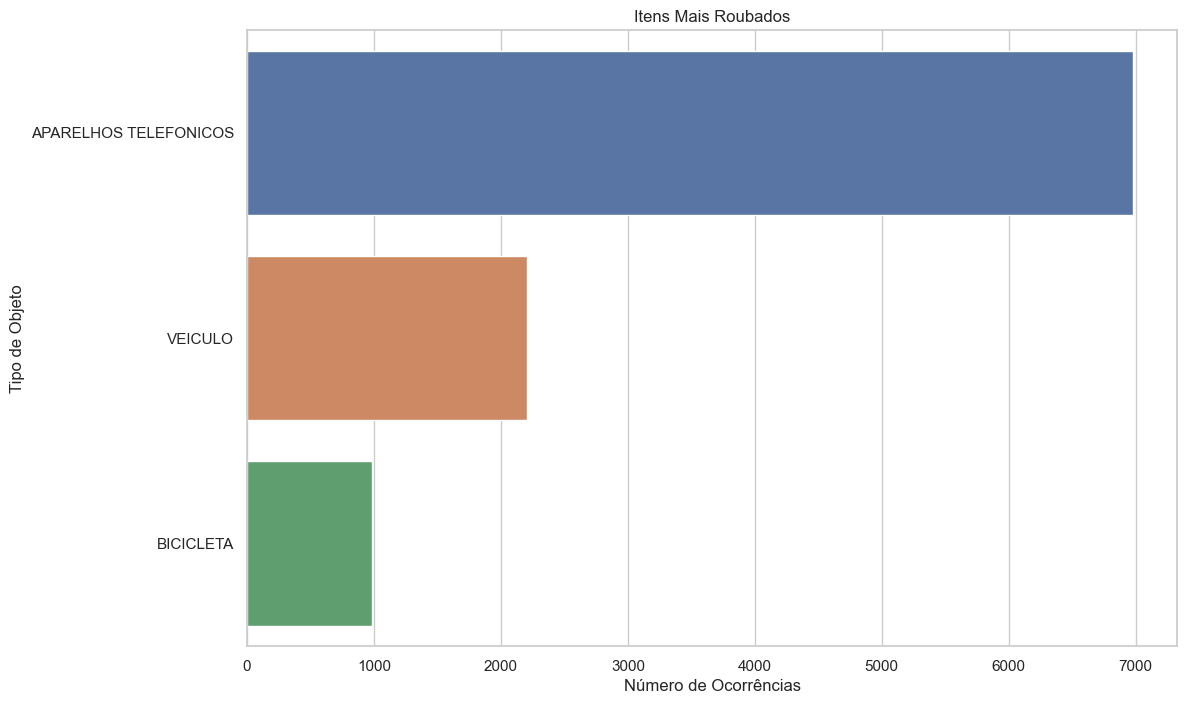

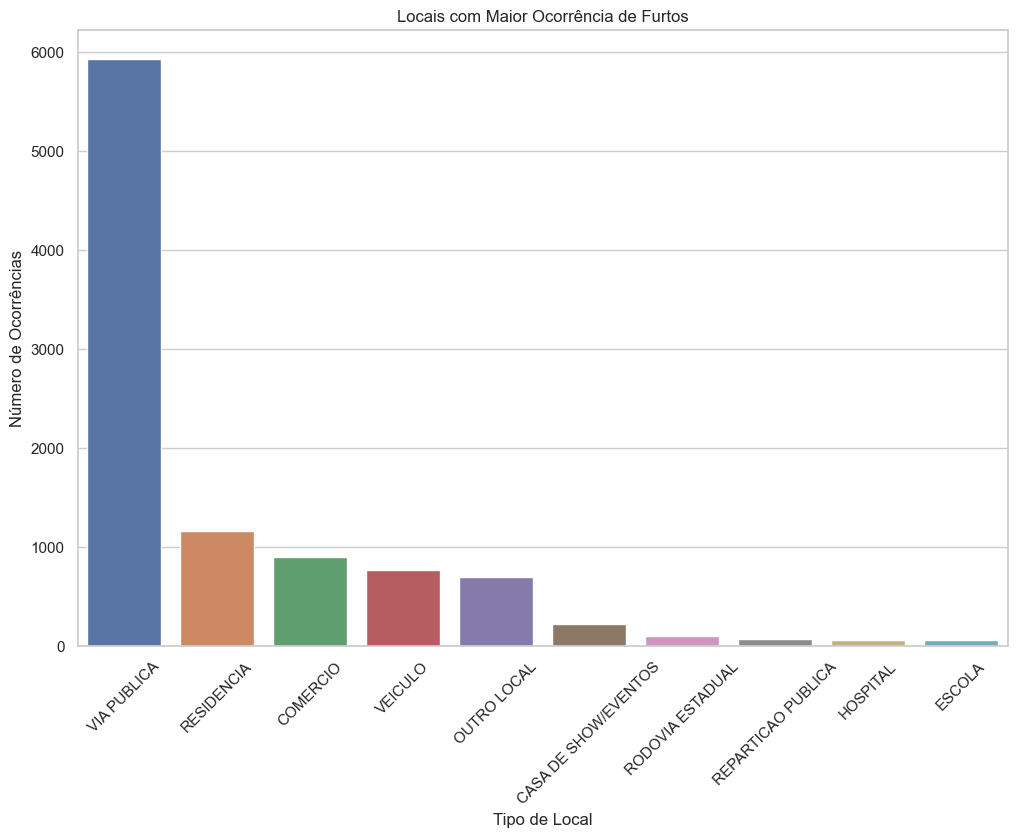

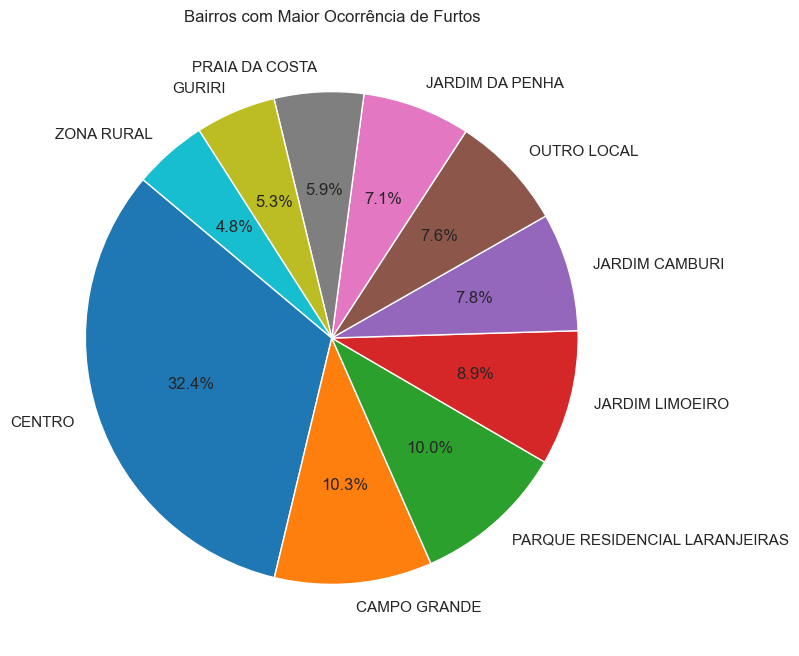

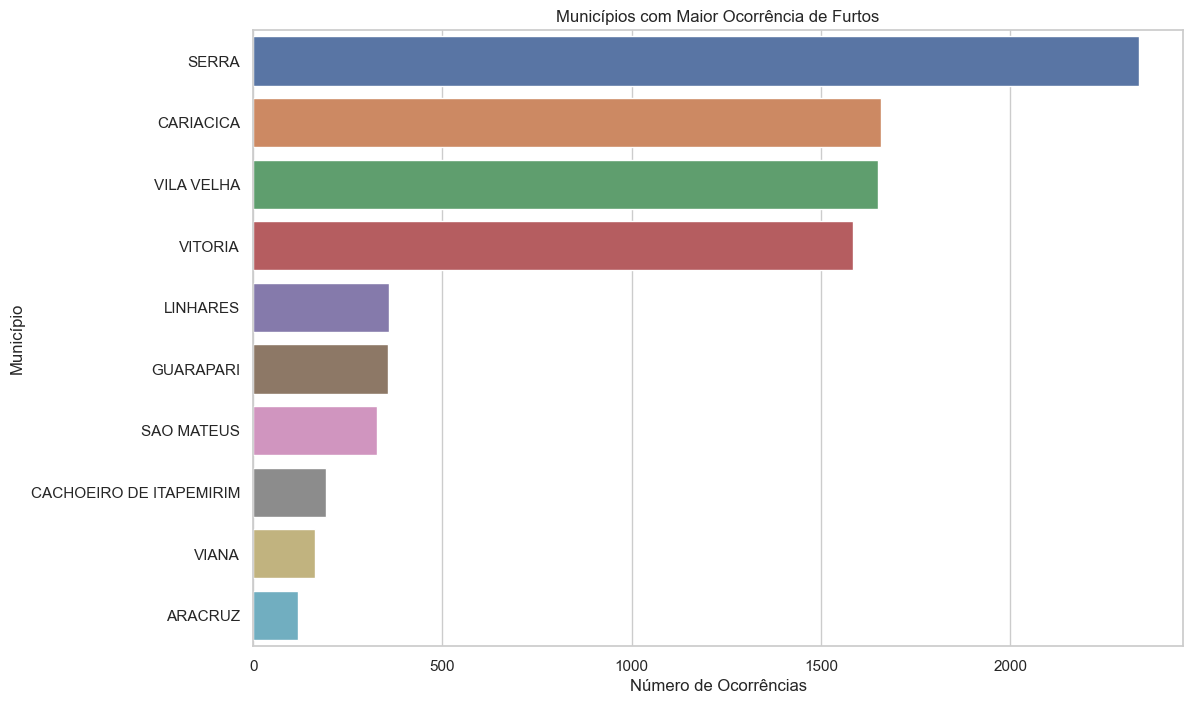

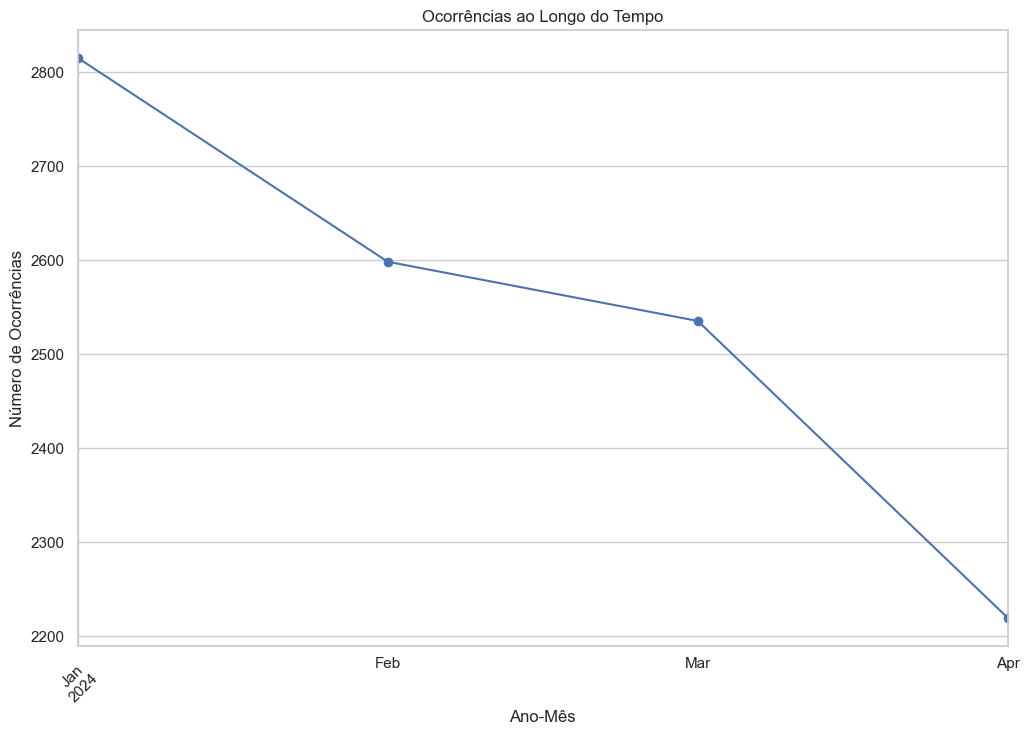

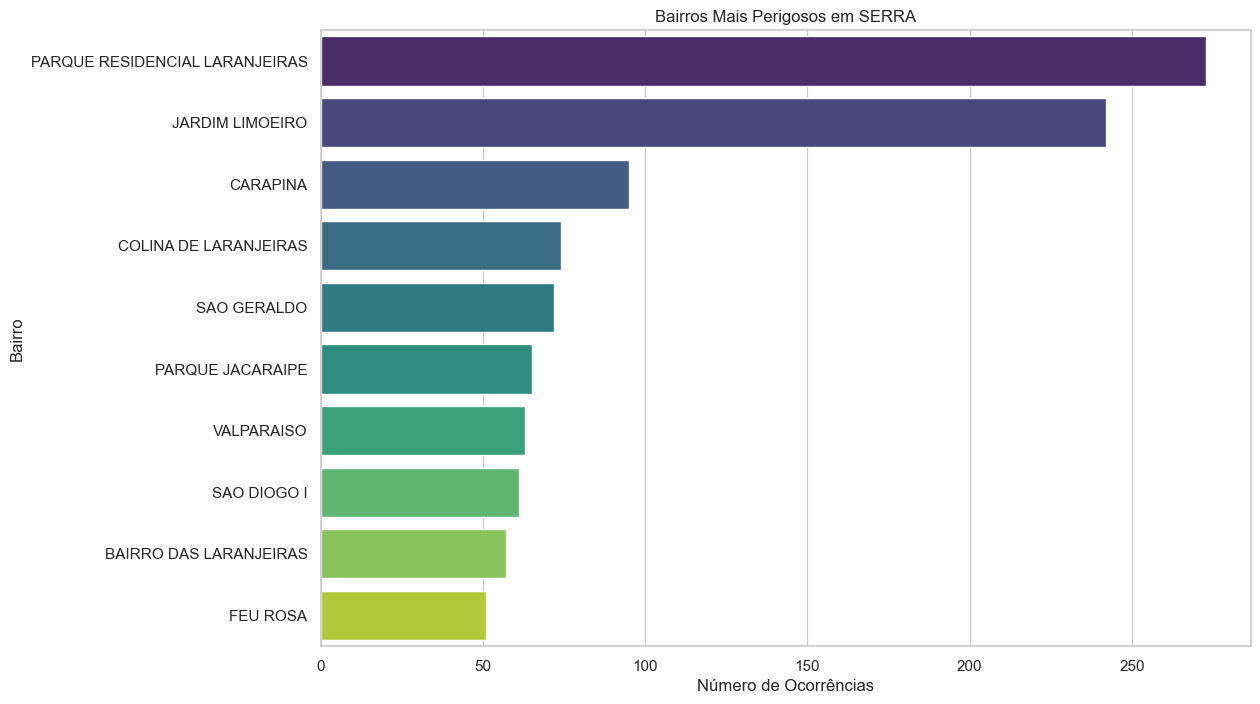

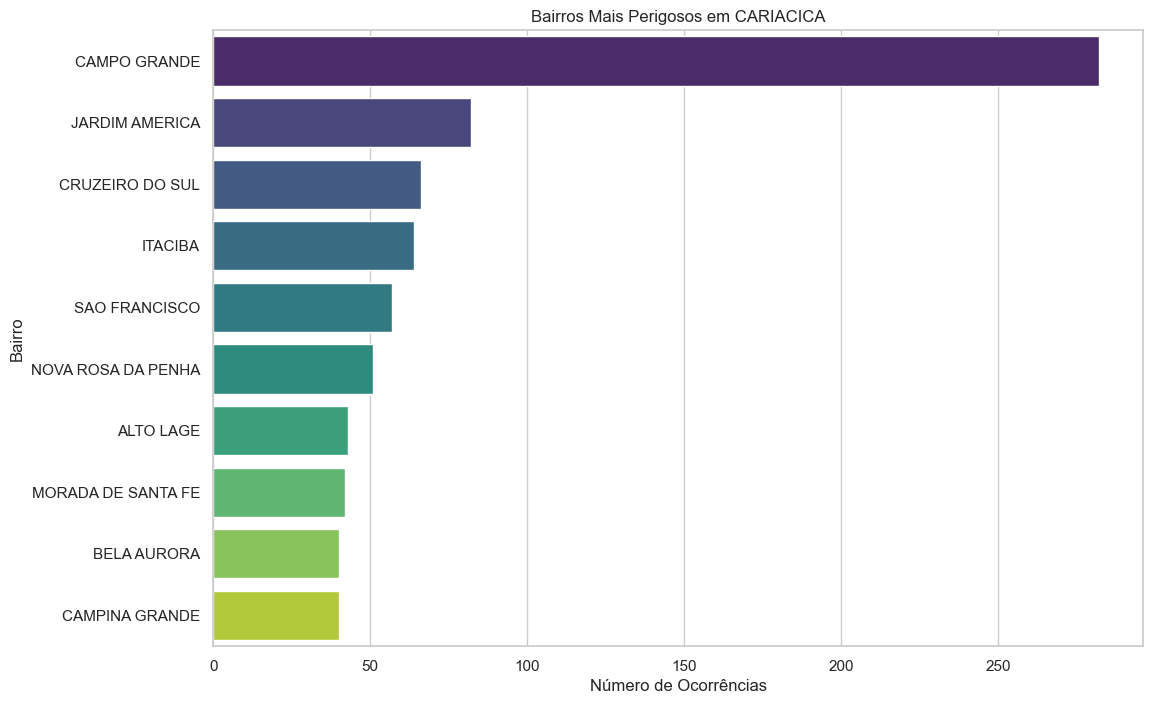

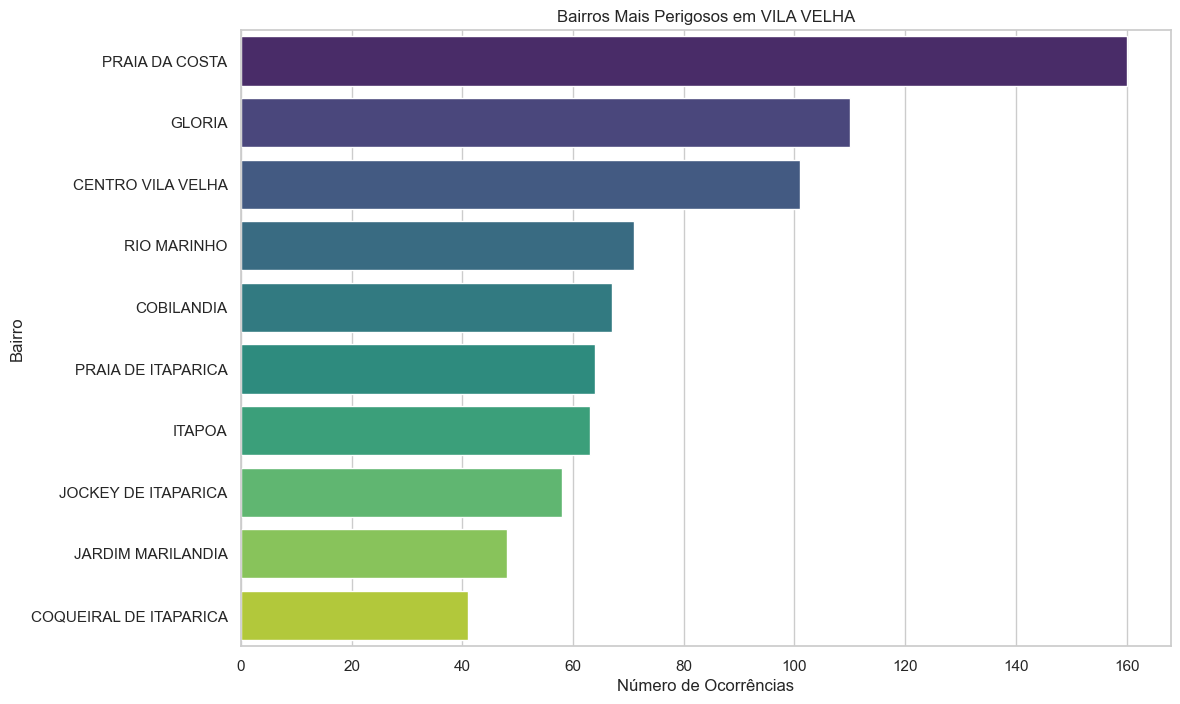

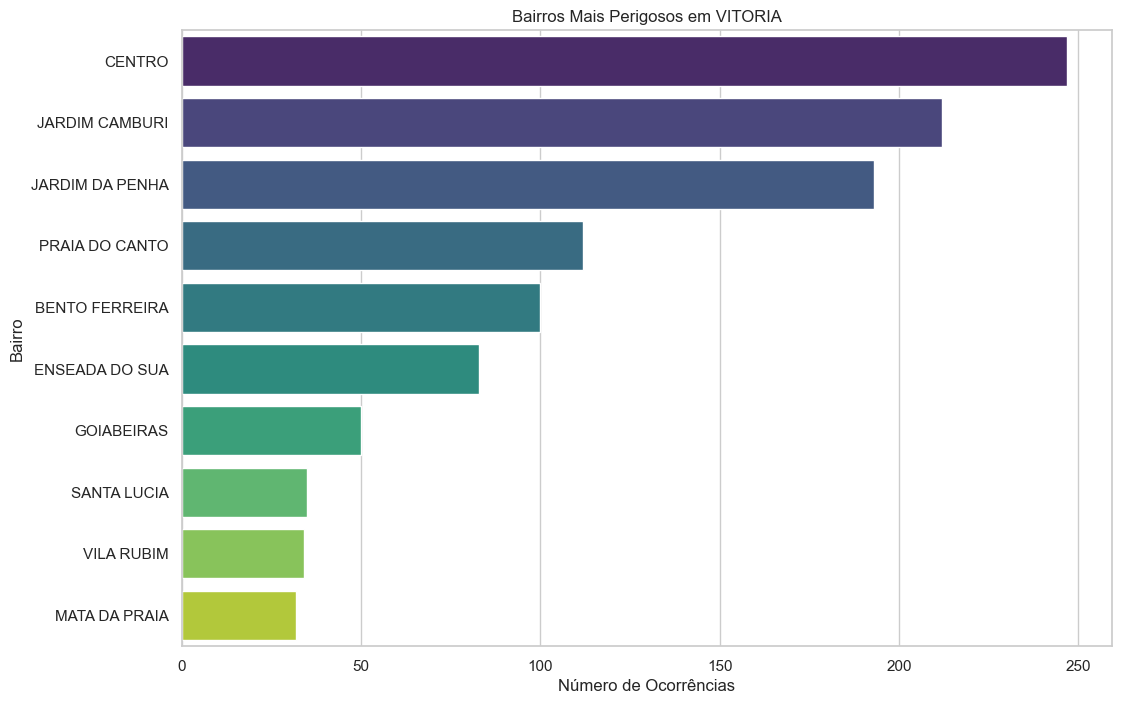

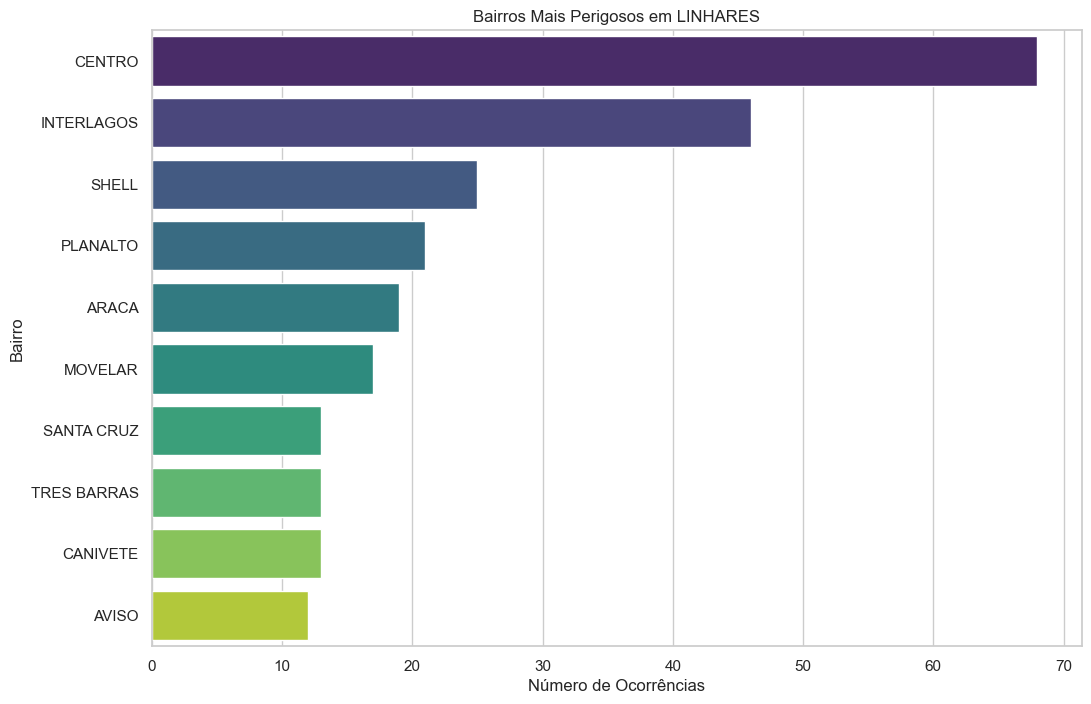

In [21]:
def main():
    # Caminho para o arquivo CSV
    file_path = 'C:/Users/jppec/Downloads/objetos_jan_abr_2024.csv'  # Certifique-se de que o caminho e o nome do arquivo estão corretos
    
    # Carregar e limpar os dados
    data = carregar_e_limpar_dados(file_path)
    
    # Criar visualizações
    criar_visualizacoes(data)

# Executar a função principal
if __name__ == "__main__":
    main()